# Classifier

In [28]:
import pandas as pd
df = pd.read_csv('Iris.csv')
df = df.drop('Id',axis=1)
df.shape

(150, 5)

## Naive Base Classifier 

In [25]:
from sklearn.model_selection import train_test_split

Y = df.Species.values
X = df.drop(['Species'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.35, random_state=35)

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
NaiveBayesModel = gnb.fit(x_train, y_train)
y_pred = NaiveBayesModel.predict(x_test)
accuracy_score(y_test, y_pred)

0.9245283018867925

In [27]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[17  0  0]
 [ 0 16  1]
 [ 0  3 16]]


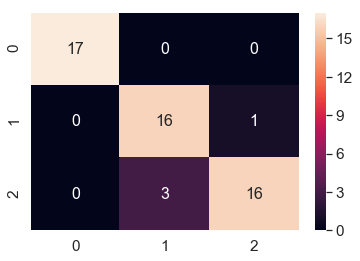

In [29]:
import seaborn as sn

sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(con_mat), annot=True,annot_kws={"size": 16})

The above code works with an accuracy of 92%

## Support Vector Machine with various classifier

In [34]:
from sklearn import svm

from sklearn.metrics import average_precision_score

x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.95)

classifier = svm.LinearSVC(random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


In [35]:

import numpy as np
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.20)

### Linear Kernel

Average precision-recall score: 0.7167957042957042


Text(0,0.5,'Precision')

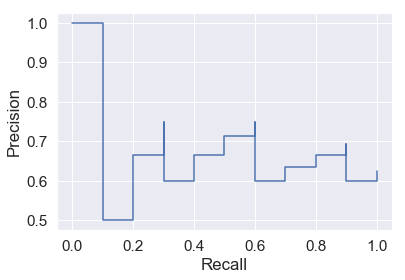

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

classifier = svm.SVC(kernel='linear', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')

### Polynomial Kernel

Average precision-recall score: 0.8234920634920635


Text(0,0.5,'Precision')

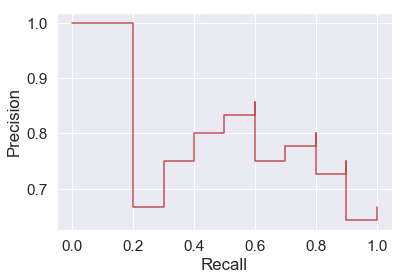

In [37]:
classifier = svm.SVC(kernel='poly', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')

### Radial Bias Kernel

Average precision-recall score: 0.6289926739926739


Text(0,0.5,'Precision')

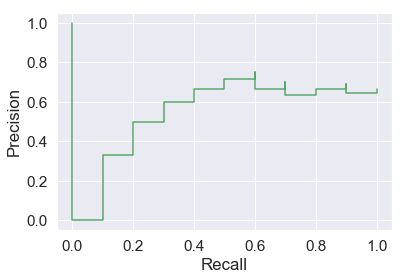

In [38]:
classifier = svm.SVC(kernel='rbf', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')

Various method for implementing the Support Vector Machine was implemented